In [105]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

data_dir = os.path.abspath(
    os.path.join(
            os.getcwd(),
            os.pardir,
            'datasets/cats_and_dogs_filtered'
        )
)

In [110]:
def loadData(data_dir):
    return tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        color_mode='grayscale',
        seed=123,
        image_size=(180, 180),
        channels=""
        batch_size=32)

print("Loading training set...")
training_set = loadData(os.path.join(data_dir, 'train'))
print("Loading validation set...")
validation_set = loadData(os.path.join(data_dir, 'validation'))

# Classes
print(training_set.class_names)


Loading training set...
Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Loading validation set...
Found 1000 files belonging to 2 classes.
Using 800 files for training.
['cats', 'dogs']


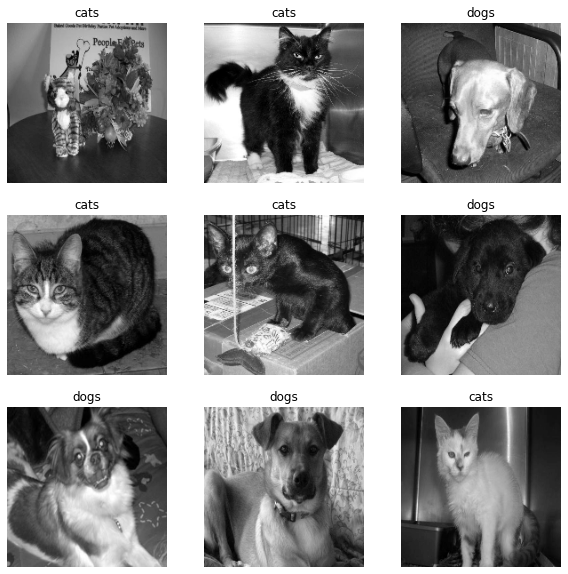

In [115]:
plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

(180, 180, 1)
3.8055573 227.76389


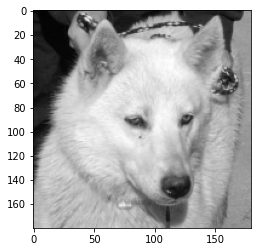

In [179]:
# for image_batch, labels_batch in training_set:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

randomFirstImg = next(iter(training_set.take(1)))[0][0]
print(randomFirstImg.shape)
plt.imshow(randomFirstImg, cmap='gray')

# You will notice that the values are from 0 to 255 because they are RGB values.
print(np.min(randomFirstImg), np.max(randomFirstImg)) 

0.053528186 0.9625454


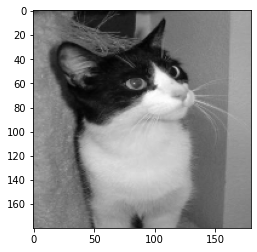

In [177]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = training_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

plt.imshow(first_image, cmap='gray')
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 